# Transfer Learning With TensorFlow

# Data Preprocessing

Code learned from [here](https://www.tensorflow.org/tutorials/images/transfer_learning)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

In [2]:
# Download Data
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
path_to_zip = tf.keras.utils.get_file(fname='D:/random_python_tricks/Data/005/cat_and_dog.zip', origin=_URL, extract=True)

In [3]:
path_to_zip

'D:/random_python_tricks/Data/005/cat_and_dog.zip'

In [4]:
BATCH_SIZE = 32
IMG_SIZE = (160, 160)
# Get the paths for train and val sets
PATH = os.path.join(os.path.dirname("D:/random_python_tricks/Data/005/cat_and_dog/cats_and_dogs_filtered/"))
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
#
train_dataset = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                            shuffle=True,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE)

validation_dataset = tf.keras.utils.image_dataset_from_directory(validation_dir,
                                                                 shuffle=True,
                                                                 batch_size=BATCH_SIZE,
                                                                 image_size=IMG_SIZE)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


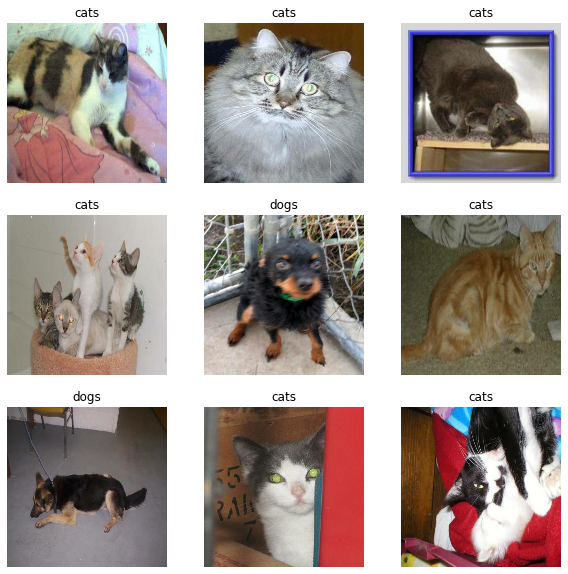

In [5]:
# Show images and labels from the training set
class_names = train_dataset.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [6]:
# As the original dataset doesn't contain a test set, you will create one. 
# To do so, determine how many batches of data are available in the validation set using tf.data.experimental.cardinality, 
# then move 20% of them to a test set.
val_batches = tf.data.experimental.cardinality(validation_dataset)
test_dataset = validation_dataset.take(val_batches // 5)
validation_dataset = validation_dataset.skip(val_batches // 5)
# 
print('Number of validation batches: %d' % tf.data.experimental.cardinality(validation_dataset))
print('Number of test batches: %d' % tf.data.experimental.cardinality(test_dataset))

Number of validation batches: 26
Number of test batches: 6


# Transfer learning via Feature Extraction

You will create the base model from the MobileNet V2 model developed at Google. 

First, you need to pick which layer of MobileNet V2 you will use for feature extraction. \
The very last classification layer (on "top", as most diagrams of machine learning models go from bottom to top) is not very useful. \
Instead, you will follow the common practice to depend on the very last layer before the flatten operation. \
This layer is called the "bottleneck layer". The bottleneck layer features retain more generality as compared to the final/top layer. \



In [7]:
# First, instantiate a MobileNet V2 model pre-loaded with weights trained on ImageNet. 
# By specifying the include_top=False argument, you load a network that doesn't include the classification layers at the top,
# which is ideal for feature extraction

# Create the base model from the pre-trained model MobileNet V2
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,  #load a network that doesn't include the classification layers at the top
                                               weights='imagenet')

In [ ]:
# This feature extractor converts each 160x160x3 image into a 5x5x1280 block of features. 
image_batch, label_batch = next(iter(train_dataset))
feature_batch = base_model(image_batch)
print(feature_batch.shape)